# Imports

In [4]:
import pyaudio
import numpy as np
from IPython.display import clear_output
from w_model import AModel, feature_exctractor
import time

# Script for working with a microphone in real time

In [5]:
CHUNK = 4096 # number of data points to read at a time
RATE = 44100 # time resolution of the recording device (Hz)
#DEVICE = 0 # default
 
p = pyaudio.PyAudio()
model = AModel()
 
stream=p.open(format=pyaudio.paInt32,
              channels=2,
              rate=RATE,
              input=True,
              frames_per_buffer=CHUNK)

# Optional list for plotting
to_plot = []

st = 0


# Main Loop
while st < 30:
    time.sleep(0.5)
    indata = np.fromstring(stream.read(CHUNK),dtype=np.int32)
 
    # Take the fft and square each value
    fftData=abs(np.fft.rfft(indata))**2

    to_plot.append(np.std(fftData))
    which = fftData[1:].argmax() + 1
    
    res = model.dpredict(fftData[1:])
    print(res)
    
    st += 1

C:\Users\GODOVO~1\AppData\Local\Temp/ipykernel_9944/1101648918.py:24: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  indata = np.fromstring(stream.read(CHUNK),dtype=np.int32)


Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel
Barrel


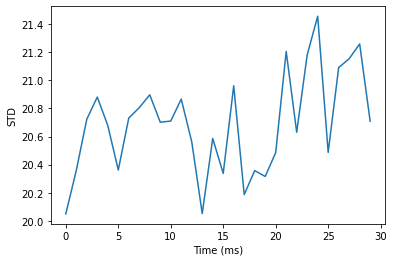

In [8]:
import matplotlib.pyplot as plt 

plt.xlabel('Time (ms)')
plt.ylabel('STD')
plt.plot(to_plot)